In [1]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

Lectura de los datos
Se asume que se han realizado 5 ensayos y que los archivos CSV están nombrados como ensayo_sin_ventilador_1.csv, ensayo_sin_ventilador_2.csv, ..., ensayo_sin_ventilador_5.csv.

In [14]:
# Lista para almacenar los DataFrames de cada ensayo
ensayos_sin_ventilador = []

# Leer los archivos CSV de los ensayos sin ventilador
for i in range(1, 6):
    archivo = f'CSV registros/ensayo_sin_ventilador_{i}.csv'
    df = pd.read_csv(archivo, encoding='latin1')  # Specify the encoding
    ensayos_sin_ventilador.append(df)

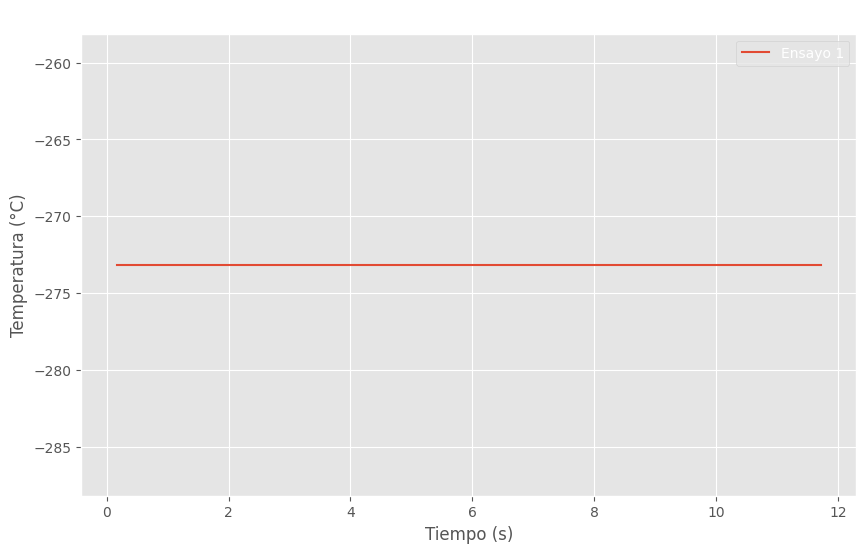

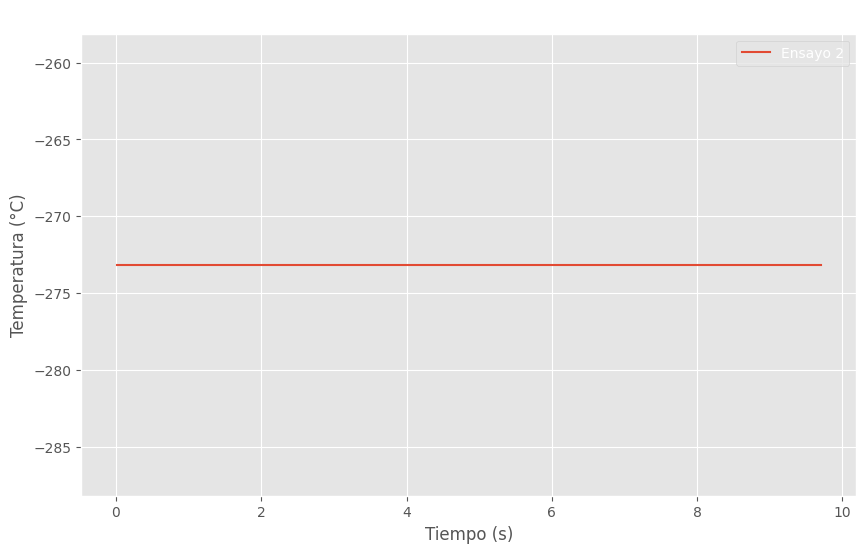

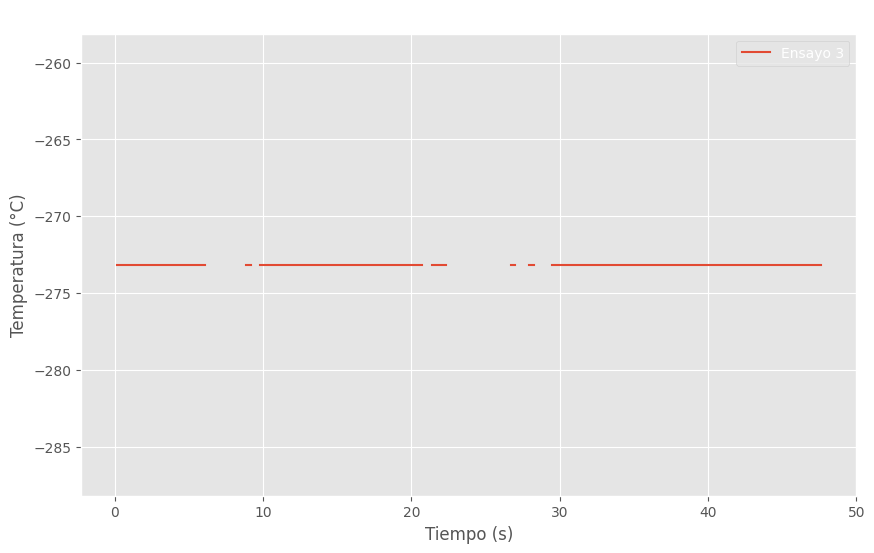

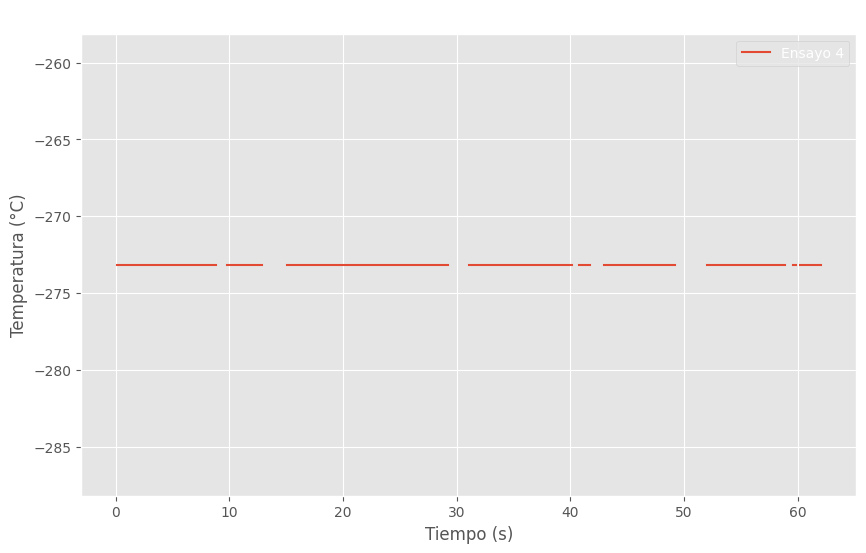

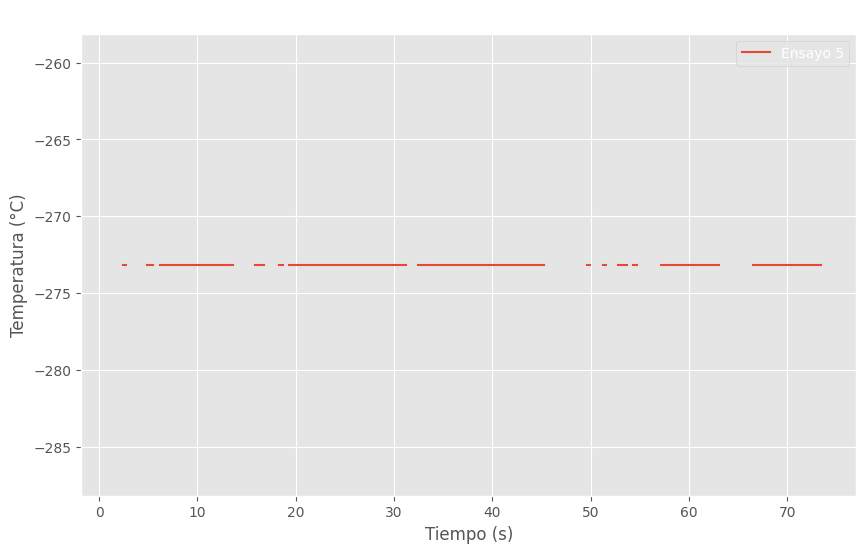

In [17]:
# Configurar el estilo de las gráficas
plt.style.use('ggplot')

# Graficar los ensayos
for i, df in enumerate(ensayos_sin_ventilador):
    plt.figure(figsize=(10, 6))
    plt.plot(df['Tiempo'], df['Temperatura (°C)'], label=f'Ensayo {i+1}')
    plt.title(f'Evolución de la Temperatura - Ensayo {i+1}')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Temperatura (°C)')
    plt.legend()
    plt.show()

Se asume que se han realizado ensayos con el ventilador a diferentes velocidades y que los archivos CSV están nombrados como ensayo_con_ventilador_1.csv, ..., ensayo_con_ventilador_5.csv.

In [24]:
# Lista para almacenar los DataFrames de cada ensayo con ventilador
ensayos_con_ventilador = []

# Leer los archivos CSV de los ensayos con ventilador
for i in range(1, 6):
    archivo = f'CSV registros/ensayo_con_ventilador_{i}.csv'
    df = pd.read_csv(archivo, encoding='latin1')
    ensayos_con_ventilador.append(df)

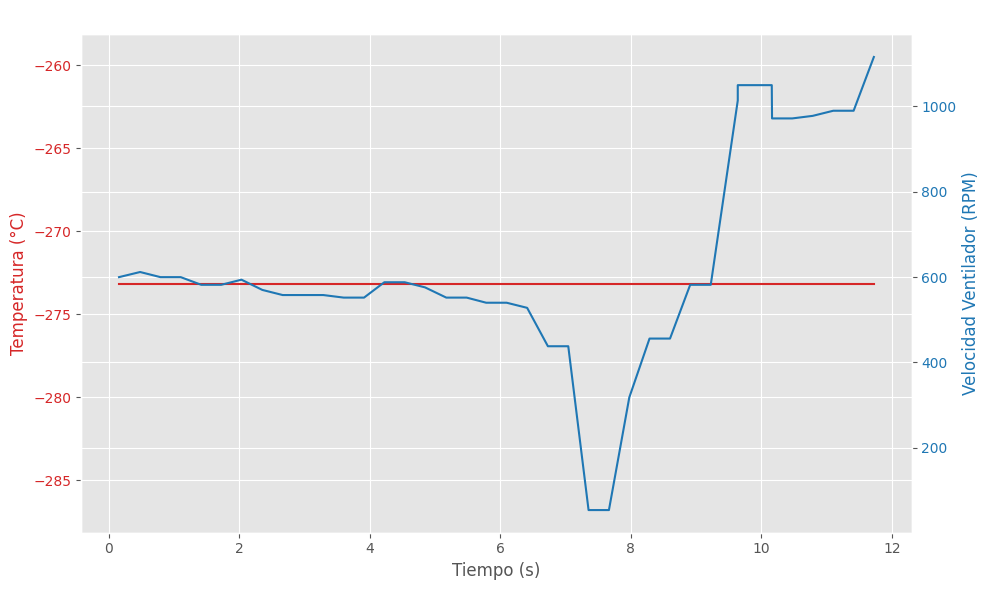

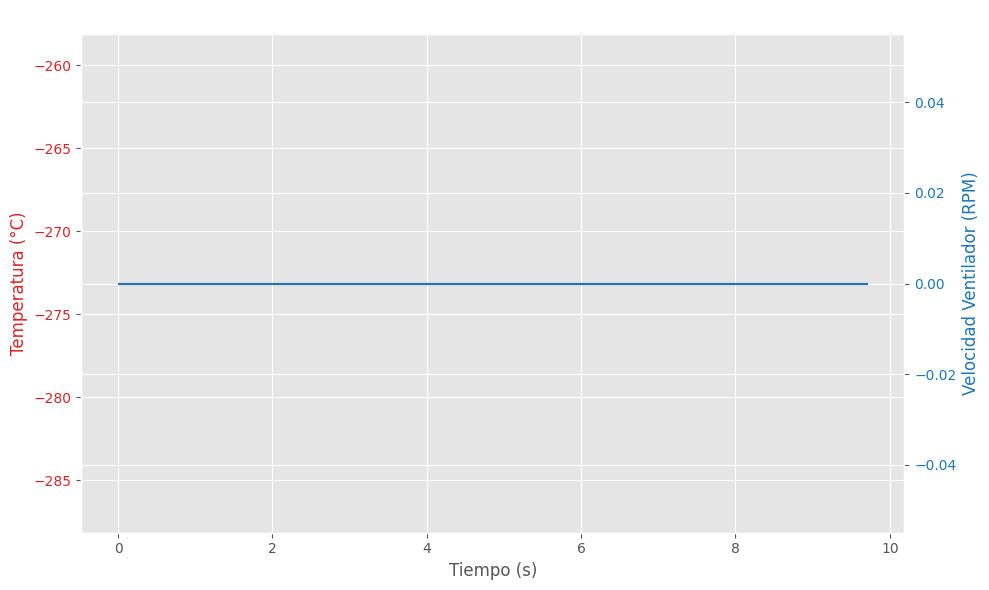

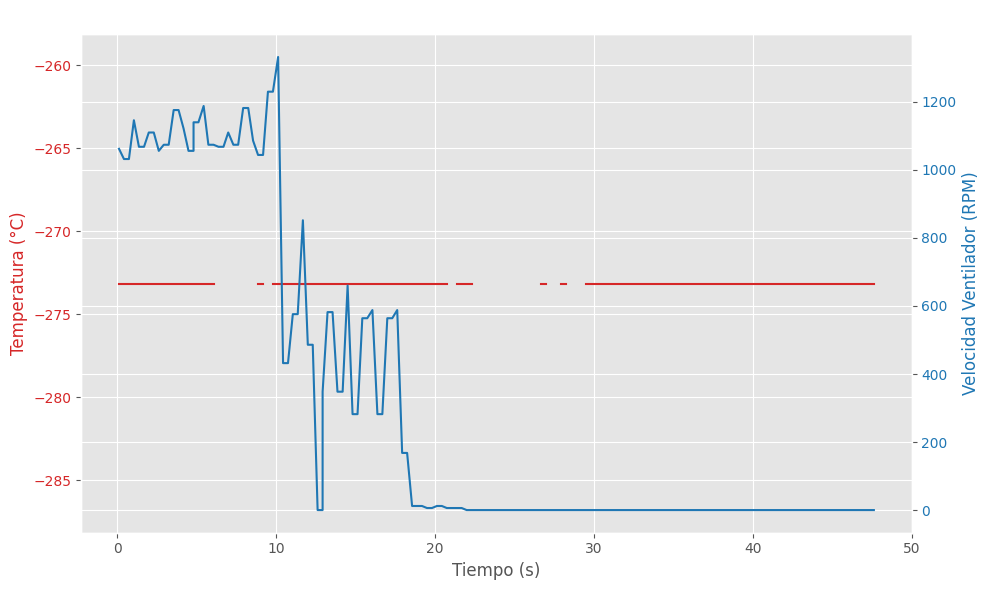

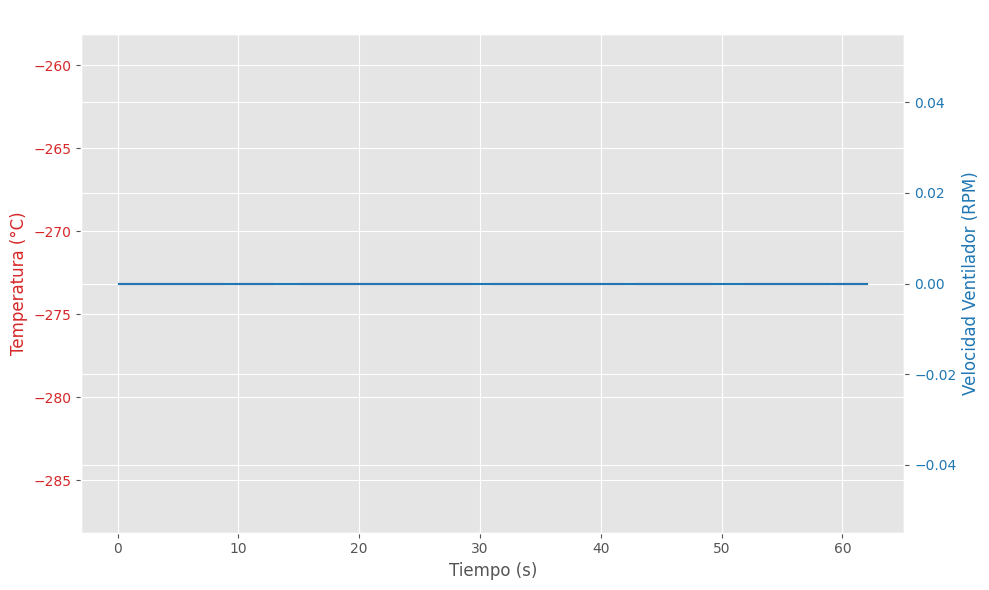

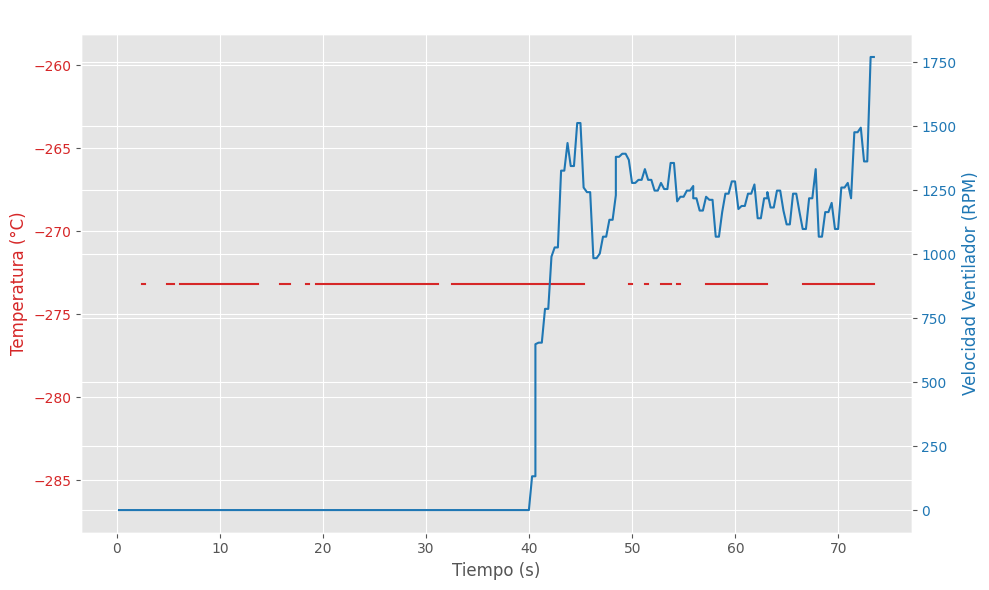

In [25]:
# Graficar los ensayos con ventilador
for i, df in enumerate(ensayos_con_ventilador):
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    ax1.set_title(f'Evolución de la Temperatura y Velocidad del Ventilador - Ensayo {i+1}')
    ax1.set_xlabel('Tiempo (s)')
    
    color = 'tab:red'
    ax1.set_ylabel('Temperatura (°C)', color=color)
    ax1.plot(df['Tiempo'], df['Temperatura (°C)'], color=color, label='Temperatura')
    ax1.tick_params(axis='y', labelcolor=color)
    
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Velocidad Ventilador (RPM)', color=color)
    ax2.plot(df['Tiempo'], df['Velocidad Ventilador (RPM)'], color=color, label='Velocidad Ventilador')
    ax2.tick_params(axis='y', labelcolor=color)
    
    fig.tight_layout()
    plt.show()

Constante de tiempo estimada (tau): 1.00 s
Ganancia estimada (K): -0.00 °C


C:\Users\Matzi\AppData\Local\Temp\ipykernel_3024\2169232419.py:15: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(modelo_temperatura, tiempo, temperatura)


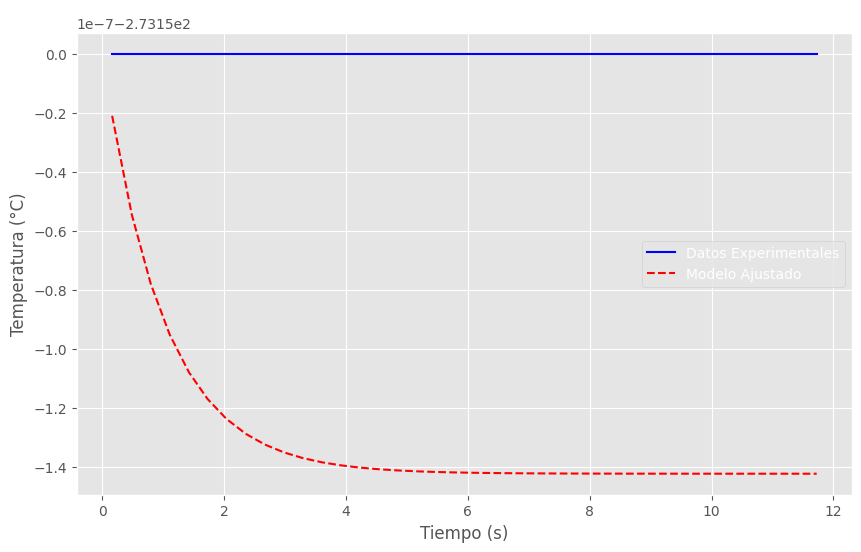

In [47]:
# Seleccionar un ensayo para ajustar
df = ensayos_sin_ventilador[0]

# Extraer los datos necesarios
tiempo = df['Tiempo']
temperatura = df['Temperatura (°C)']
potencia = ((df['Potencia Luz (%)'].iloc[0] * 20 / 100) - ((df['Potencia Luz (%)'].iloc[0] * 20 / 100)*0.03)) /100  #convertir la potencia de la luz a potencia de radiación

# Definir la función modelo
def modelo_temperatura(t, tau, K):
    T_amb = temperatura.iloc[0]  # Temperatura inicial como aproximación de T_amb
    return T_amb + K * potencia * (1 - np.exp(-t / tau))

# Realizar el ajuste de curva
popt, pcov = curve_fit(modelo_temperatura, tiempo, temperatura)

tau_estimada, K_estimada = popt

print(f"Constante de tiempo estimada (tau): {tau_estimada:.2f} s")
print(f"Ganancia estimada (K): {K_estimada:.2f} °C")

# Graficar el ajuste
temperatura_modelo = modelo_temperatura(tiempo, *popt)

plt.figure(figsize=(10, 6))
plt.plot(tiempo, temperatura, 'b-', label='Datos Experimentales')
plt.plot(tiempo, temperatura_modelo, 'r--', label='Modelo Ajustado')
plt.title('Ajuste del Modelo de Primer Orden')
plt.xlabel('Tiempo (s)')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()